In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# hall effect

In [33]:
def straight_line(x, m, c): return m*x+c
def fit_line(xs, ys):
    popt = linregress(xs, ys)
    xFit = np.arange(min(xs), max(xs), 2e-4)
    label = f'For the best fit line (r-value = {popt.rvalue**2:.3f}):\nslope = ({popt.slope:.2e} ± {popt.stderr:.2e})' + f'\nintercept = ({popt.intercept:.2e} ± {popt.intercept_stderr:.2e})' 

    return xFit, straight_line(xFit, popt.slope, popt.intercept), (popt.slope, popt.intercept), (popt.stderr, popt.intercept_stderr), label

C:\Users\user\AppData\Local\Temp\ipykernel_16060\1832868743.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dps" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.tight_layout();plt.savefig('2.png', dps=300)


(1880.623894054899, 89.37432964319305)

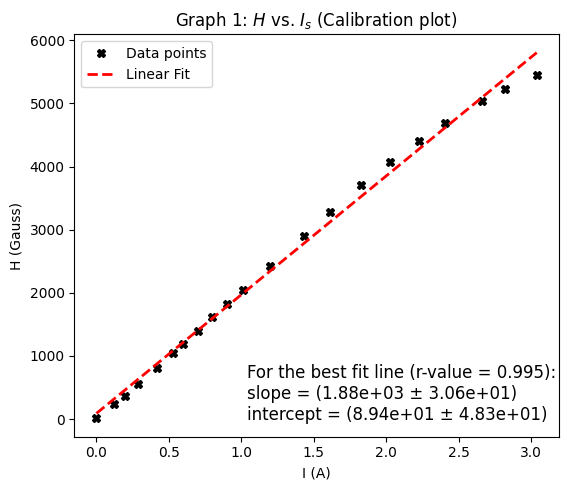

In [54]:
data = pd.read_excel('data.xlsx', sheet_name='calibration')
xx, yy, fit, error, label = fit_line(data['i'], data['b'])
plt.figure(figsize=(6,5))
plt.plot(data['i'], data['b'], 'kX', label='Data points')
# plt.errorbar(data['i'], data['b'], yerr=10, fmt='kX', label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
plt.legend()
plt.ylabel('H (Gauss)')
plt.xlabel('I (A)')
plt.text(0.42,0.15,label, fontsize=12,transform=plt.gcf().transFigure)
B, C = fit
plt.title(r'Graph 1: $H$ vs. $I_{s}$ (Calibration plot)')
calibratedB = lambda i: (B*i) + C
plt.tight_layout();plt.savefig('2.png', dps=300)
B,C

Hall coefficient: -377.36152442 \pm 15.22997146 mm^3/C
Charge carrier density: 1.656e+16 \pm 6.684e+14 mm^-3
Charge carrier mobility: -4.906e-02 \pm 1.980e-03 mm^2/Vs


C:\Users\user\AppData\Local\Temp\ipykernel_16060\361728859.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dps" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.tight_layout();plt.savefig('1.png', dps=300)


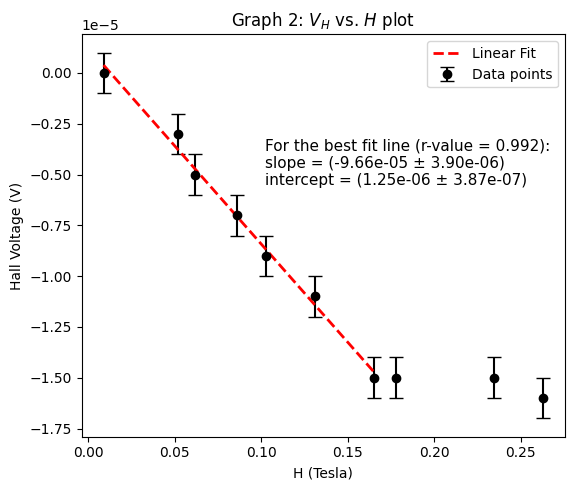

In [57]:
data1 = pd.read_excel('data.xlsx', sheet_name='rh1')
b1 = calibratedB(data1['coil_current'])*1e-4 # tesla
t1 = 0.35*1e-3 # mm
i1 = 89.6*1e-3 # mA
xx, yy, fit1, error1, label1 = fit_line(b1[:7], data1['hall_voltage'][:7]*1e-3)
plt.figure(figsize=(6,5))
plt.errorbar(b1, data1['hall_voltage']*1e-3, yerr=0.001*1e-3, fmt='ko', capsize=5, label='Data points')
plt.plot(xx,yy, 'r--', linewidth=2, label='Linear Fit')
# plt.plot(b1, data1['hall_voltage']*1e-3, 'ko', label='Data points')
plt.legend()
plt.xlabel('H (Tesla)')
plt.ylabel('Hall Voltage (V)')
plt.text(0.45,0.62,label1, fontsize=11,transform=plt.gcf().transFigure)
hc1 = fit1[0]*t1/i1*1e9
hc1_err = hc1*error1[0]/fit1[0]
print(f'Hall coefficient: {hc1:.8f} \pm {hc1_err:.8f} mm^3/C')
print(f'Charge carrier density: {-1/(1.6e-19*hc1):.3e} \pm {(1/(1.6e-19*hc1))*(hc1_err/hc1):.3e} mm^-3')
print(f'Charge carrier mobility: {(1.3e-4*hc1):.3e} \pm {1.3e-4*hc1_err:.3e} mm^2/Vs')
plt.title(r'Graph 2: $V_H$ vs. $H$ plot')
plt.tight_layout();plt.savefig('1.png', dps=300)